In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
df_drug_summary = pd.read_csv(r"C:\Users\User\OneDrive\NHS Dig Data\BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv")
df_regional_summary = pd.read_csv(r"C:\Users\User\OneDrive\NHS Dig Data\BSA_ODP_PCA_REGIONAL_SUMMARY.csv")

In [8]:
print("Drug summary information")
print(df_drug_summary.head(5))
print(df_drug_summary.info())
print("Regional summary information")
print(df_regional_summary.head(5))
print(df_regional_summary.info())

Drug summary information
   YEAR  YEAR_MONTH               REGION_NAME BNF_CHEMICAL_SUBSTANCE  ITEMS  \
0  2021      202101           EAST OF ENGLAND            Agomelatine    183   
1  2021      202101                    LONDON            Agomelatine    411   
2  2021      202101                  MIDLANDS            Agomelatine    252   
3  2021      202101  NORTH EAST AND YORKSHIRE            Agomelatine    366   
4  2021      202101                NORTH WEST            Agomelatine    119   

       COST  
0   7405.37  
1  18227.63  
2  12344.56  
3  11183.06  
4   4783.72  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9455 entries, 0 to 9454
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YEAR                    9455 non-null   int64  
 1   YEAR_MONTH              9455 non-null   int64  
 2   REGION_NAME             9455 non-null   object 
 3   BNF_CHEMICAL_SUBSTANCE  9455 non-null   

# Part 1
Questions

Question 1: Nationally, calculate the top 10 prescribed anti-depressants across the whole time frame, sorted from biggest from smallest.

Question 2: Calculate the monthly national cost of Mirtazapine prescribing

Question 3: What is the annual spend of Sertraline hydrochloride prescribing in the Midlands region?

In [9]:
# Question 1: Nationally, calculate the top 10 prescribed anti-depressants across the whole time frame, 
top_10_antidepressants = df_drug_summary.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS'].sum().sort_values(ascending=False).head(10).reset_index()

print("Top 10 prescribed anti-depressants across the whole time frame:")
print(top_10_antidepressants)


Top 10 prescribed anti-depressants across the whole time frame:
        BNF_CHEMICAL_SUBSTANCE     ITEMS
0     Sertraline hydrochloride  85402251
1  Amitriptyline hydrochloride  59272937
2      Citalopram hydrobromide  52891620
3                  Mirtazapine  46335570
4     Fluoxetine hydrochloride  28211759
5                  Venlafaxine  21447209
6     Duloxetine hydrochloride  14262656
7                 Escitalopram   6580386
8     Paroxetine hydrochloride   4886615
9      Trazodone hydrochloride   4861813


In [10]:
#Question 2: Calculate the monthly national cost of Mirtazapine prescribing
mirtazapine_data = df_drug_summary[df_drug_summary['BNF_CHEMICAL_SUBSTANCE'] == 'Mirtazapine']

monthly_mirtazapine_cost = mirtazapine_data.groupby('YEAR_MONTH')['COST'].sum().reset_index()

print("Monthly national cost of Mirtazapine prescribing:")
print(monthly_mirtazapine_cost)


Monthly national cost of Mirtazapine prescribing:
    YEAR_MONTH        COST
0       202101  2380030.90
1       202102  2249220.63
2       202103  2523008.14
3       202104  2039348.02
4       202105  1935629.32
5       202106  2055820.88
6       202107  1609248.23
7       202108  1539582.17
8       202109  1621383.70
9       202110  1356643.04
10      202111  1429072.08
11      202112  1496540.76
12      202201  1174913.49
13      202202  1094983.89
14      202203  1248772.91
15      202204  1141081.07
16      202205  1190452.94
17      202206  1155918.28
18      202207  1060524.71
19      202208  1097570.56
20      202209  1107894.62
21      202210  1096392.40
22      202211  1125694.74
23      202212  1153658.07
24      202301  1137624.14
25      202302  1046988.40
26      202303  1202506.98
27      202304  1076691.16
28      202305  1151848.40
29      202306  1170895.45
30      202307  1067405.39
31      202308  1093233.80
32      202309  1083696.99
33      202310  1137520.24
34   

In [11]:
# Question 3: What is the annual spend of Sertraline hydrochloride prescribing in the Midlands region?
sertraline_midlands = df_drug_summary[(df_drug_summary['BNF_CHEMICAL_SUBSTANCE'] == 'Sertraline hydrochloride') & 
                                      (df_drug_summary['REGION_NAME'].str.contains('MIDLANDS', case = False))]

annual_sertraline_cost_midlands = sertraline_midlands.groupby('YEAR')['COST'].sum().reset_index()

print("Annual spend of Sertraline hydrochloride prescribing in the Midlands region:")
print(annual_sertraline_cost_midlands)

Annual spend of Sertraline hydrochloride prescribing in the Midlands region:
   YEAR         COST
0  2021  17477276.46
1  2022   6433863.59
2  2023   7600322.04
3  2024   8094889.16


# Part 2 Data Visualisation
Questions

Question 1: Create a horizontal bar chart of the top 5 most prescribed drugs in 2024, arranged in order.

Question 2: Create a vertical bar chart showing the total annual cost of Sertraline hydrochloride prescribing in the NORTH WEST region.

Question 3: Create a line chart of the nationally monthly cost (rounded to the nearest pound) of escitalopram.


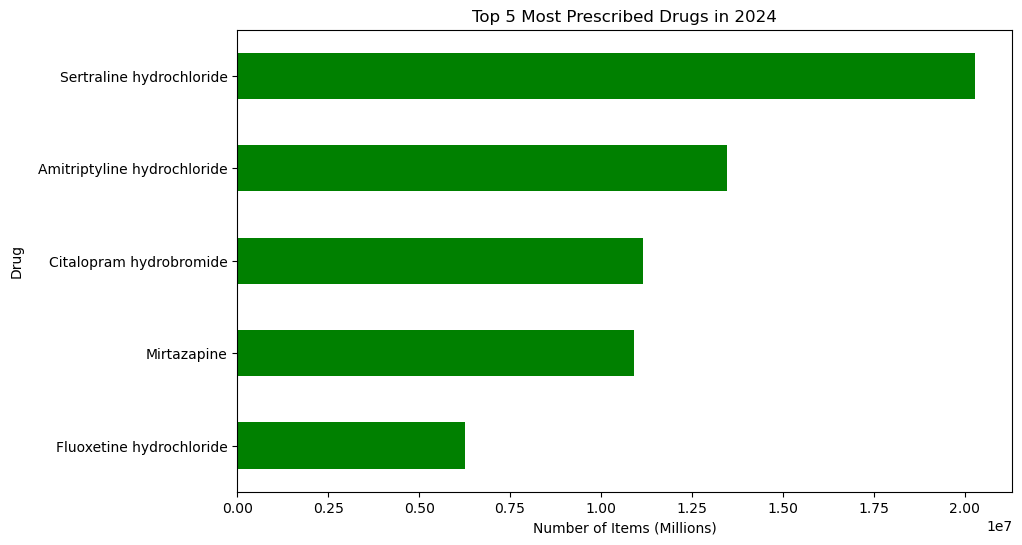

BNF_CHEMICAL_SUBSTANCE
Sertraline hydrochloride       20289221
Amitriptyline hydrochloride    13453325
Citalopram hydrobromide        11156770
Mirtazapine                    10907989
Fluoxetine hydrochloride        6273887
Name: ITEMS, dtype: int64


In [12]:
# Create a horizontal bar chart of the top 5 most prescribed drugs in 2024, arranged in order.
df_2024 = df_drug_summary[df_drug_summary['YEAR'] == 2024]

# Group by BNF_CHEMICAL_SUBSTANCE and sum the ITEMS
top_5_drugs_2024 = df_2024.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS'].sum().sort_values(ascending=False).head(5)

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
top_5_drugs_2024.plot(kind='barh', color='green')
plt.xlabel('Number of Items (Millions)')
plt.ylabel('Drug', labelpad=10)
plt.title('Top 5 Most Prescribed Drugs in 2024')
plt.gca().invert_yaxis()
plt.show()

print (top_5_drugs_2024)

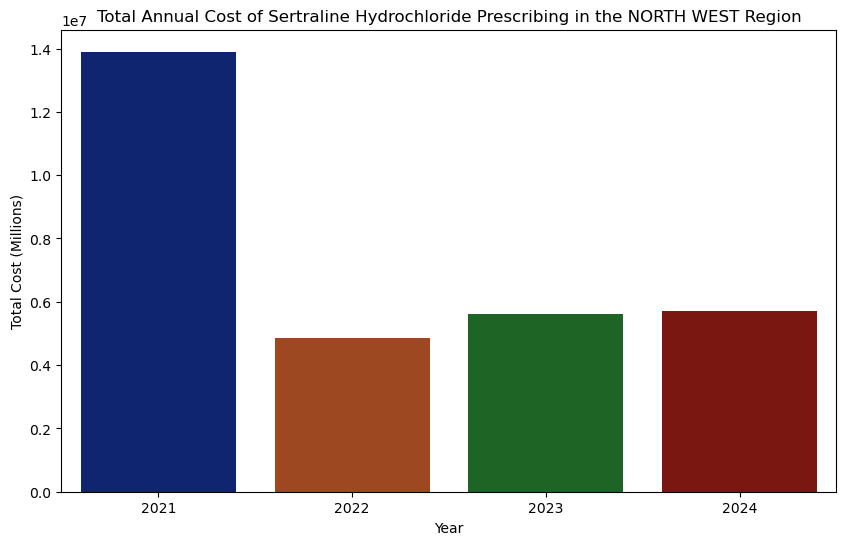

   YEAR         COST
0  2021  13899005.81
1  2022   4858451.61
2  2023   5624860.02
3  2024   5698311.51


In [13]:
# Question 2: Create a vertical bar chart showing the total annual cost of Sertraline hydrochloride prescribing in the NORTH WEST region.
sertraline_north_west = df_drug_summary[(df_drug_summary['BNF_CHEMICAL_SUBSTANCE'] == 'Sertraline hydrochloride') & 
                                        (df_drug_summary['REGION_NAME'].str.contains('NORTH WEST', case=False))]

annual_sertraline_cost_north_west = sertraline_north_west.groupby('YEAR')['COST'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='YEAR', y='COST', data=annual_sertraline_cost_north_west, palette='dark')
plt.xlabel('Year')
plt.ylabel('Total Cost (Millions)')
plt.title('Total Annual Cost of Sertraline Hydrochloride Prescribing in the NORTH WEST Region')
plt.show()

print(annual_sertraline_cost_north_west)

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


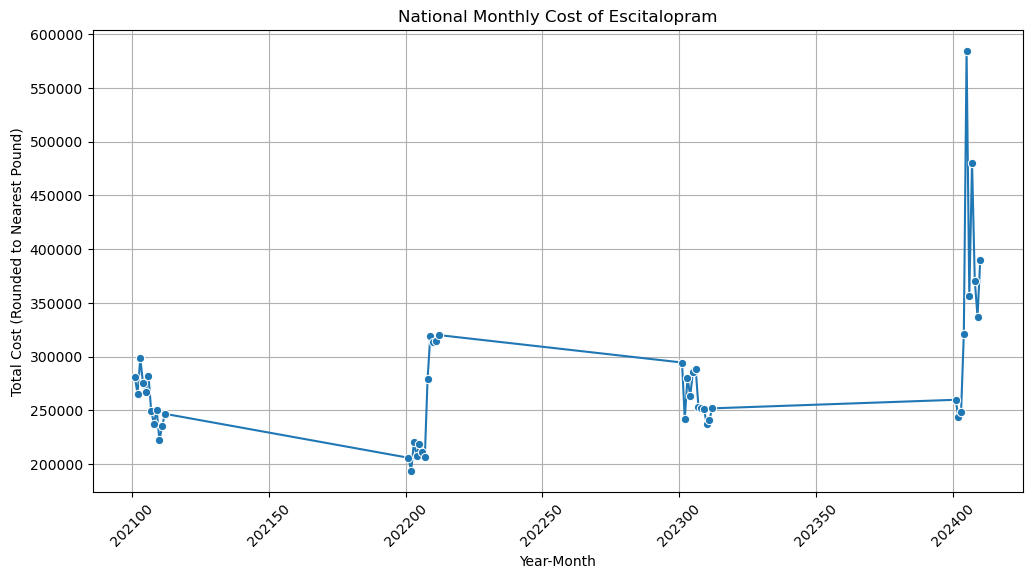

In [14]:
# Question 3: Create a line chart of the nationally monthly cost (rounded to the nearest pound) of escitalopram.
escitalopram_data = df_drug_summary[df_drug_summary['BNF_CHEMICAL_SUBSTANCE'] == 'Escitalopram']

monthly_escitalopram_cost = escitalopram_data.groupby('YEAR_MONTH')['COST'].sum().round().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='YEAR_MONTH', y='COST', data=monthly_escitalopram_cost, marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Total Cost (Rounded to Nearest Pound)')
plt.title('National Monthly Cost of Escitalopram')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Part 3: Data Metrics and Insights

Question 1: For context, create a monthly line chart showing total national prescribing cost

Question 2: Create annual summary statistics, for the min, Q1, median, Q3 and maximum national monthly prescribing cost (i.e. all drugs across all regions)

Question 3: Create a grouped boxplot that shows the above information (4 boxplots, 1 per year)

Question 4: Calculate the annual mean monthly total national prescribing cost and display in a vertical barchart

Question 5: Create a (pivoted) table that shows the cost of anti-depressant prescribing per region per year?



In [15]:
df_regional_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR_MONTH   322 non-null    int64  
 1   REGION_NAME  322 non-null    object 
 2   ITEMS        322 non-null    int64  
 3   COST         322 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 10.2+ KB


c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


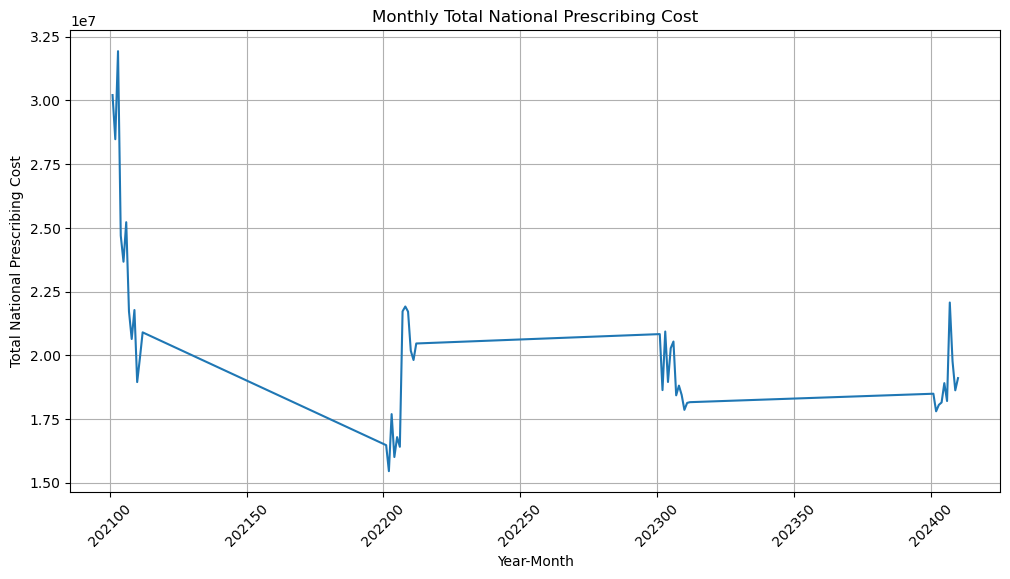

In [ ]:
# Question 1: For context, create a monthly line chart showing total national prescribing cost

monthly_national_cost = df_regional_summary.groupby('YEAR_MONTH')['COST'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='YEAR_MONTH', y='COST', data=monthly_national_cost) #, marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Total National Prescribing Cost')
plt.title('Monthly Total National Prescribing Cost')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# Question 2: Create annual summary statistics, for the min, Q1, median, Q3 and maximum national monthly prescribing cost (i.e. all drugs across all regions)
annual_summary_stats = monthly_national_cost.groupby(monthly_national_cost['YEAR_MONTH'] // 100)['COST'].describe(percentiles=[.25, .5, .75])

annual_summary_stats = annual_summary_stats[['min', '25%', '50%', '75%', 'max']].reset_index()
annual_summary_stats.columns = ['YEAR', 'Min', 'Q1', 'Median', 'Q3', 'Max']

print("Annual summary statistics for the national monthly prescribing cost:")
print(annual_summary_stats)

Annual summary statistics for the national monthly prescribing cost:
   YEAR          Min            Q1        Median            Q3          Max
0  2021  18949756.25  2.083549e+07  2.272424e+07  2.603658e+07  31933609.64
1  2022  15453991.47  1.645837e+07  1.875420e+07  2.077687e+07  21914896.72
2  2023  17859075.18  1.836279e+07  1.872291e+07  2.034416e+07  20934041.83
3  2024  17802904.89  1.816383e+07  1.856003e+07  1.905628e+07  22071625.09


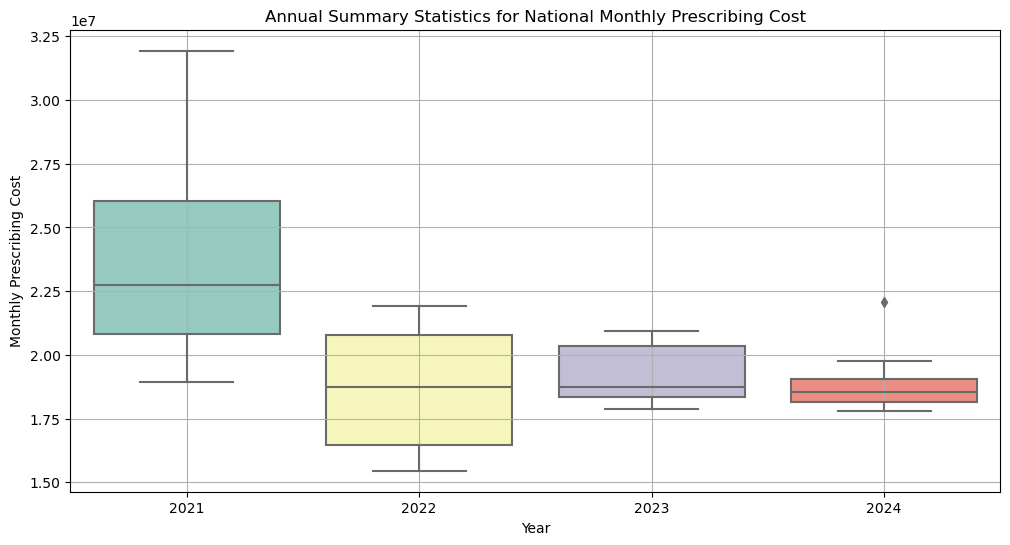

In [18]:
# Question 3: Create a grouped boxplot that shows the above information (4 boxplots, 1 per year)
monthly_national_cost['YEAR'] = monthly_national_cost['YEAR_MONTH'] // 100

plt.figure(figsize=(12, 6))
sns.boxplot(x='YEAR', y='COST', data=monthly_national_cost, palette='Set3')
plt.xlabel('Year')
plt.ylabel('Monthly Prescribing Cost')
plt.title('Annual Summary Statistics for National Monthly Prescribing Cost')
plt.grid(True)
plt.show()

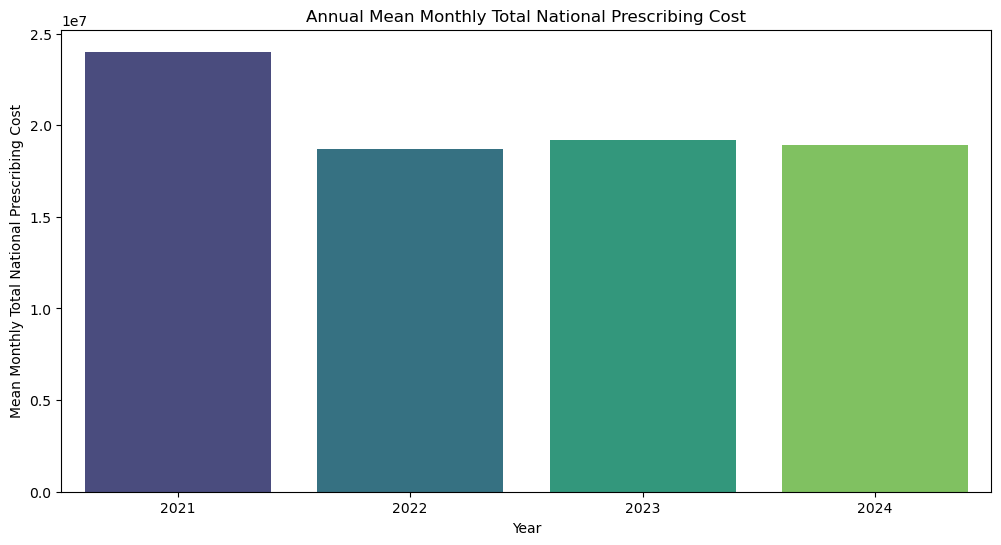

   YEAR          COST
0  2021  2.400827e+07
1  2022  1.872070e+07
2  2023  1.916780e+07
3  2024  1.891889e+07


In [ ]:
# Question 4: Calculate the annual mean monthly total national prescribing cost and display in a vertical barchart
annual_mean_monthly_cost = monthly_national_cost.groupby('YEAR')['COST'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='YEAR', y='COST', data=annual_mean_monthly_cost, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Mean Monthly Total National Prescribing Cost')
plt.title('Annual Mean Monthly Total National Prescribing Cost')
plt.show()

print(annual_mean_monthly_cost)

In [20]:
# EXTRAS = identifying the cost of prescribing per region for df_regional_summary
cost_per_region = df_regional_summary.groupby('REGION_NAME')['COST'].sum().reset_index()

items_per_region = df_regional_summary.groupby('REGION_NAME')['ITEMS'].sum().reset_index()

region_summary = pd.merge(items_per_region, cost_per_region, on='REGION_NAME')

print("Summary of items and cost per region:")
print(region_summary)

Summary of items and cost per region:
                REGION_NAME     ITEMS          COST
0           EAST OF ENGLAND  38431318  1.058483e+08
1                    LONDON  35896285  1.045064e+08
2                  MIDLANDS  62669553  1.761022e+08
3  NORTH EAST AND YORKSHIRE  72090463  1.755055e+08
4                NORTH WEST  49786016  1.321767e+08
5                SOUTH EAST  41867132  1.435012e+08
6                SOUTH WEST  32336814  9.430996e+07


In [21]:
# Create a (pivoted) table that shows the cost of anti-depressant prescribing per region per year?
pivot_table = df_regional_summary.pivot_table(values= cost_per_region, index='YEAR_MONTH', columns='REGION_NAME', aggfunc='sum')

print("Pivoted table showing the cost of anti-depressant prescribing per region per year:")
print(pivot_table)

Pivoted table showing the cost of anti-depressant prescribing per region per year:
                       COST                                                   \
REGION_NAME EAST OF ENGLAND      LONDON    MIDLANDS NORTH EAST AND YORKSHIRE   
YEAR_MONTH                                                                     
202101           3406002.61  3205663.66  5698605.43               5741978.96   
202102           3180281.76  3078749.18  5363909.04               5432553.60   
202103           3531679.32  3521757.09  6002909.22               6146084.47   
202104           2811986.93  2651395.00  4646928.32               4658988.98   
202105           2696129.04  2608656.29  4430595.30               4438678.54   
202106           2822995.30  2768824.51  4749457.80               4766515.31   
202107           2501638.21  2409483.97  4073899.34               4002613.26   
202108           2358955.99  2257668.38  3860055.91               3859428.12   
202109           2464376.26  2435127.

In [22]:
pivot_table_items_cost = df_regional_summary.pivot_table(values='COST', index='YEAR_MONTH', columns='REGION_NAME', aggfunc='sum')

print("Pivoted table showing the cost of items prescribing per region per year:")
print(pivot_table_items_cost)

Pivoted table showing the cost of items prescribing per region per year:
REGION_NAME  EAST OF ENGLAND      LONDON    MIDLANDS  \
YEAR_MONTH                                             
202101            3406002.61  3205663.66  5698605.43   
202102            3180281.76  3078749.18  5363909.04   
202103            3531679.32  3521757.09  6002909.22   
202104            2811986.93  2651395.00  4646928.32   
202105            2696129.04  2608656.29  4430595.30   
202106            2822995.30  2768824.51  4749457.80   
202107            2501638.21  2409483.97  4073899.34   
202108            2358955.99  2257668.38  3860055.91   
202109            2464376.26  2435127.20  4078868.85   
202110            2162406.51  2116300.49  3546214.68   
202111            2252728.21  2266282.32  3669974.75   
202112            2360240.16  2320525.35  3886847.87   
202201            1899041.63  1889475.33  3017360.68   
202202            1785777.46  1742286.46  2850712.24   
202203            2018653.81  2

In [23]:
# Alternatively being that the regional summary dataset has Year_month data variables,
# we can use this to create a pivot table that shows the cost of anti-depressant prescribing per region per year

antidepressants = df_drug_summary[df_drug_summary['BNF_CHEMICAL_SUBSTANCE'].isin(top_10_antidepressants['BNF_CHEMICAL_SUBSTANCE'])]

pivot_table = antidepressants.pivot_table(values='COST', index='YEAR', columns='REGION_NAME', aggfunc='sum')

print("Pivoted table showing the cost of anti-depressant prescribing per region per year:")
print(pivot_table)

Pivoted table showing the cost of anti-depressant prescribing per region per year:
REGION_NAME  EAST OF ENGLAND       LONDON     MIDLANDS  \
YEAR                                                     
2021             27240298.74  25519429.42  46028509.39   
2022             20681290.13  19362651.14  34730173.00   
2023             21443612.33  20470394.17  36442507.61   
2024             17822608.00  16643674.72  30298362.73   

REGION_NAME  NORTH EAST AND YORKSHIRE   NORTH WEST   SOUTH EAST   SOUTH WEST  
YEAR                                                                          
2021                      47078317.28  36504607.39  35203811.79  24670183.63  
2022                      34909423.83  26481743.54  26512539.39  18519900.98  
2023                      36634694.32  27292972.92  26981901.77  19059003.76  
2024                      31138238.30  22391475.43  22091940.06  15347976.01  


# Making Predictions
The SARIMAX model would be used to train the dataset as this model is a time series forecasting model. it incorporates seasonal pattern and external factors to improve the accuracy of the model. The model would be trained on the monthly prescribing volumes of the anti-depressants and the model would be used to predict the prescribing volumes for the next 20 months. The model would be evaluated using the mean squared error metric.


In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [31]:
monthly_volumes = df_drug_summary.groupby('YEAR_MONTH')['ITEMS'].sum()
                                  #.isin(top_10_antidepressants['BNF_CHEMICAL_SUBSTANCE'])].groupby('YEAR_MONTH')['ITEMS'].sum()

In [32]:
train_data = monthly_volumes[:int(0.8*(len(monthly_volumes)))]
test_data = monthly_volumes[int(0.8*(len(monthly_volumes))):]

In [36]:
model = SARIMAX(train_data, order=(1, 2, 7), seasonal_order=(1, 2, 7, 12))
model_fit = model.fit(disp=False)

c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Us

In [37]:
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

print(predictions)

36    1.018365e+07
37    9.533068e+06
38    1.098188e+07
39    9.994423e+06
40    1.061776e+07
41    1.120010e+07
42    1.104053e+07
43    1.119546e+07
44    1.120463e+07
45    1.148630e+07
Name: predicted_mean, dtype: float64


c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


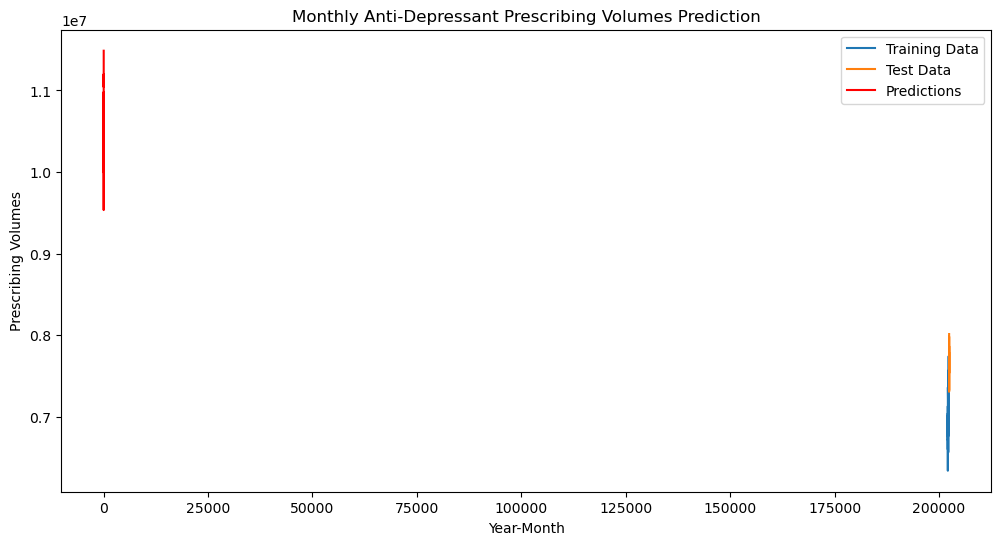

36    1.018365e+07
37    9.533068e+06
38    1.098188e+07
39    9.994423e+06
40    1.061776e+07
41    1.120010e+07
42    1.104053e+07
43    1.119546e+07
44    1.120463e+07
45    1.148630e+07
Name: predicted_mean, dtype: float64


In [38]:
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(predictions, label='Predictions', color='red')
plt.xlabel('Year-Month')
plt.ylabel('Prescribing Volumes')
plt.title('Monthly Anti-Depressant Prescribing Volumes Prediction')
plt.legend()
plt.show()

print(predictions)